<a href="https://colab.research.google.com/github/Jaiharish-passion07/Almabetter-Capstone_project/blob/master/Scaling_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Github Link:[All types of Feature Transformation](https://github.com/krishnaik06/Types-Of-Trnasformation)

Other Links 
1. [Refer-1](https://reinec.medium.com/my-notes-handling-skewed-data-5984de303725)

2. [Refer-2](https://opendatascience.com/transforming-skewed-data-for-machine-learning/) 

[Model Selection and Hyperparameter Tuning](https://medium.com/@alexstrebeck/training-and-testing-machine-learning-models-e1f27dc9b3cb)

## Transformation of Features

Why Transformation of Features Are Required?

    1.Linear Regression---Gradient Descent ----Global Minima
    2.Algorithms like KNN,K Means,Hierarichal Clustering--- Eucledian Distance

Every Point has some vectors and Directiom


Deep Learning Techniques(Standardization, Scaling) 1.ANN--->GLobal Minima, Gradient 2.CNN 3.RNN

0-255 pixels

## Types Of Transformation
    1.Normalization And Standardization
    2.Scaling to Minimum And Maximum values
    3.Scaling To Median And Quantiles
    4.Guassian Transformation
        i)Logarithmic Transformation 
        ii)Reciprocal Trnasformation 
        iii)Square Root Transformation 
        iv)Exponential Trnasformation 
        v)Box Cox Transformation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
datas=pd.read_csv('C:/Users/WELCOME/Downloads/Datasets/titaninc/train.csv',usecols=['Pclass','Age','Fare','Survived'])
titanic=pd.DataFrame(datas)

In [ ]:
titanic.head()

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500


In [ ]:
titanic.fillna(titanic.median(),inplace=True)

In [ ]:
titanic.isnull().sum()

Survived    0
Pclass      0
Age         0
Fare        0
dtype: int64

### Standardization

    1.We try to bring all the variables or features to a similar scale.
    2.Standarisation means centering the variable at zero(Mean=0&S.D=1),z=(x-x_mean)/std
    3.It works well mostly in Machine Learning

#### Standardization Using Sklearn Library

#### fit vs fit_transform
    fit:we just fit or train the datas to model(In all ML Algorithm we use only fit method)
    fit_transform:we apply to algorithm(standard scaler) and transform or change our datas(Kind of tranformation like standardization we use fit_transform method,used for prreprocessing Libraries)

In [ ]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [ ]:
scaled_features=scale.fit_transform(titanic)

In [ ]:
titanic_scaled_Features=pd.DataFrame(scaled_features,columns=[titanic.columns])
titanic_scaled_Features#All values ranging from -1 to 1

,Survived,Pclass,Age,Fare
0,-0.789272,0.827377,-0.565736,-0.502445
1,1.266990,-1.566107,0.663861,0.786845
2,1.266990,0.827377,-0.258337,-0.488854
3,1.266990,-1.566107,0.433312,0.420730
4,-0.789272,0.827377,0.433312,-0.486337
...,...,...,...,...
886,-0.789272,-0.369365,-0.181487,-0.386671
887,1.266990,-1.566107,-0.796286,-0.044381
888,-0.789272,0.827377,-0.104637,-0.176263
889,1.266990,-1.566107,-0.258337,-0.044381


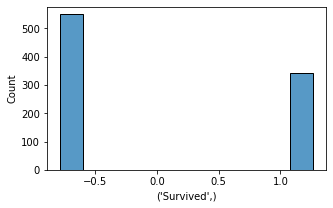

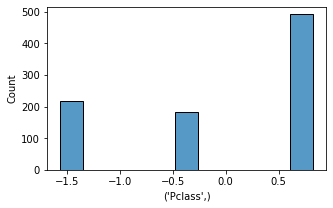

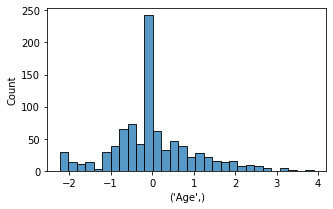

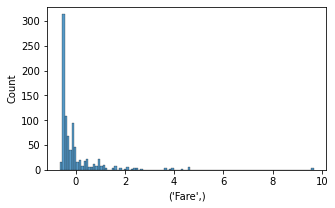

In [ ]:
for i in titanic_scaled_Features.columns:
    plt.figure(figsize=(5,3))
    sns.histplot(titanic_scaled_Features[i])
    plt.show()

### Min Max Scaling

     1.Min Max Scaling scales the values between 0 to 1. X_scaled = (X - X.min / (X.max - X.min)
     2.It works well with Deep Learning(CNN)

#### Min Max Scaling Using Sklearn Library

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scale=MinMaxScaler()

In [ ]:
titanic_min_max_scaled=pd.DataFrame(min_max_scale.fit_transform(titanic),columns=titanic.columns)
titanic_min_max_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,1.0,0.271174,0.014151
1,1.0,0.0,0.472229,0.139136
2,1.0,1.0,0.321438,0.015469
3,1.0,0.0,0.434531,0.103644
4,0.0,1.0,0.434531,0.015713


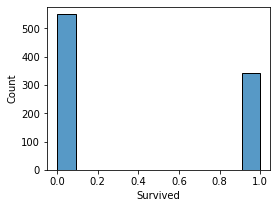

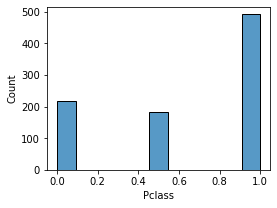

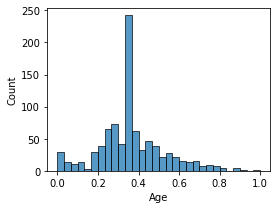

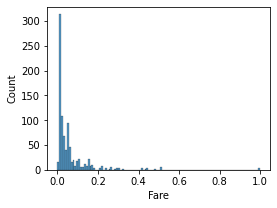

In [ ]:
for i in titanic_min_max_scaled.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(titanic_min_max_scaled[i])
    plt.show()

### Robust Scalar

    It is used to scale the feature to median and quantiles Scaling using median and quantiles consists of substracting the median to all the observations, and then dividing by the interquantile difference. The interquantile difference is the difference between the 75th and 25th quantile:

    IQR = 75th quantile - 25th quantile

X_scaled = (X - X.median) / IQR

0,1,2,3,4,5,6,7,8,9,10

9-90 percentile---90% of all values in this group is less than 9 
1-10 precentile---10% of all values in this group is less than 1 


#### Robust Scaling Using Sklearn Library

    1.It is more robust to Outliers,Which means it is better to scale if Outliers are also present.
    2.If distribution of variable is skewed,Perhaps it is better to scale using mean&quantile method,which is more robust to presence of outliers

In [ ]:
from sklearn.preprocessing import RobustScaler
r_s=RobustScaler()

In [ ]:
titanic_robust_scaled=pd.DataFrame(r_s.fit_transform(titanic),columns=titanic.columns)
titanic_robust_scaled.head()

,Survived,Pclass,Age,Fare
0,0.0,0.0,-0.461538,-0.312011
1,1.0,-2.0,0.769231,2.461242
2,1.0,0.0,-0.153846,-0.282777
3,1.0,-2.0,0.538462,1.673732
4,0.0,0.0,0.538462,-0.277363


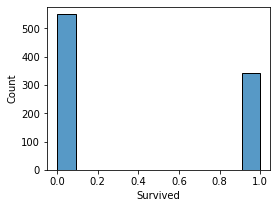

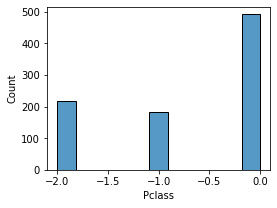

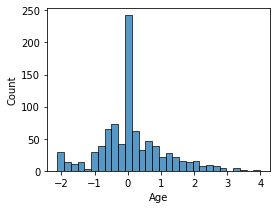

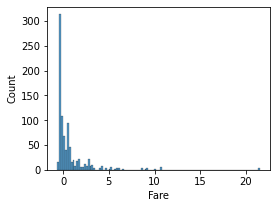

In [ ]:
for i in titanic_robust_scaled.columns:
    plt.figure(figsize=(4,3))
    sns.histplot(titanic_robust_scaled[i])
    plt.show()

## Guassian Transformation
        Some machine learning algorithms like linear and logistic assume that the features are normally distributed -Accuracy -Performance
        Which It is used to transform some other distribution to Gaussian Distribution

i)Logarithmic Transformation 
ii)Reciprocal Trnasformation 
iii)Square Root Transformation 
iv)Exponential Trnasformation 
v)Box Cox Transformation

In [ ]:
df=pd.read_csv('C:/Users/WELCOME/Downloads/Datasets/titaninc/train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df['Age']=df['Age'].fillna(df['Age'].median())

In [ ]:
import scipy.stats as stat
import pylab

In [ ]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

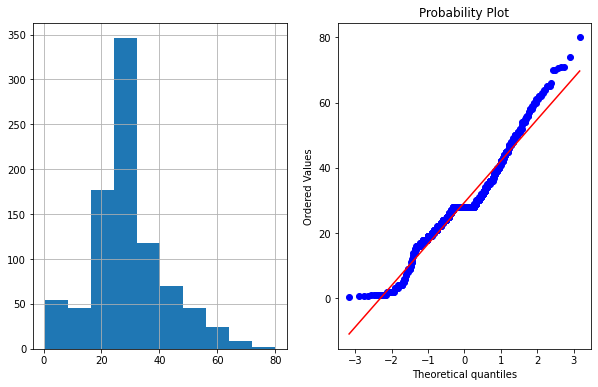

In [ ]:
plot_data(df,'Age')

#### Logarithmic Transformation

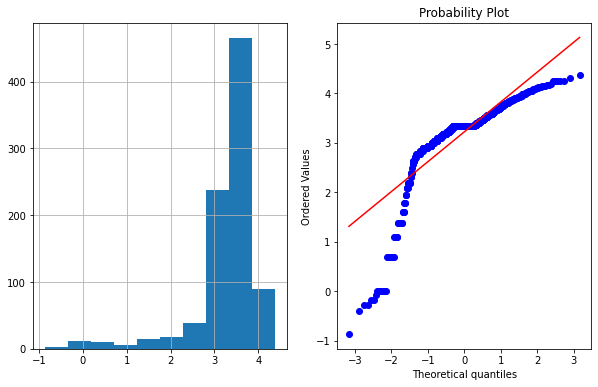

In [ ]:
df['Age_log']=np.log(df['Age'])
plot_data(df,'Age_log')

#### Reciprocal Transformation

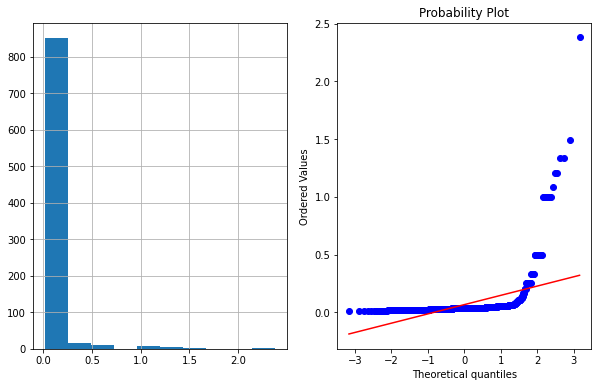

In [ ]:
df['Age_reciprocal']=1/df.Age
plot_data(df,'Age_reciprocal')

#### Square Root Transformation

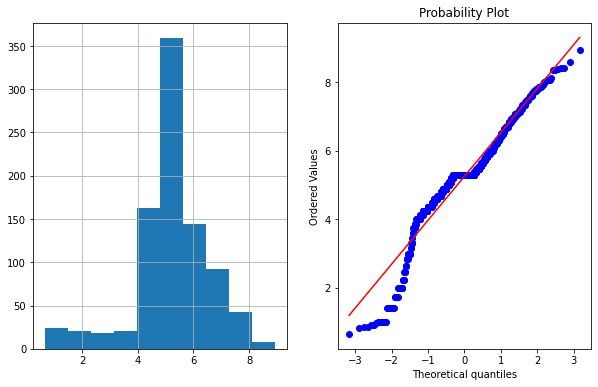

In [ ]:
df['Age_sqaure']=df.Age**(1/2)
plot_data(df,'Age_sqaure')

#### Exponential Transdormation


In [ ]:
df['Age_exponential']=df.Age**(1/1.2)
plot_data(df,'Age_exponential')

NameError: name 'df' is not defined

#### BoxCOx Transformation

In [ ]:
df['Age_Boxcox'],parameters=stat.boxcox(df['Age'])

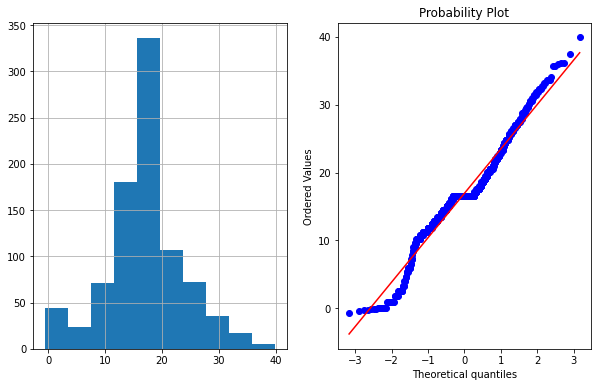

In [ ]:
plot_data(df,'Age_Boxcox')

krishnaik reference:https://github.com/krishnaik06/Feature-Engineering-Live-sessions/blob/master/Feature%20Engineering-%20Normalization%20And%20Standardization-%20Day%205.ipynb

c:\users\welcome\pycharmprojects\avifamily\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

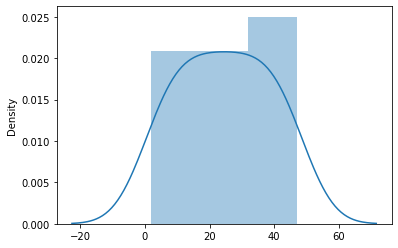

In [ ]:
a=[i for i in range(2,50,3)]
sns.distplot(a)

In [ ]:
 plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    a.hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

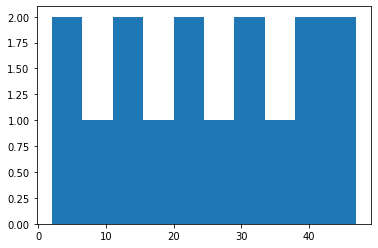

In [ ]:
plt.hist(a)
plt.show()

<AxesSubplot:ylabel='Count'>

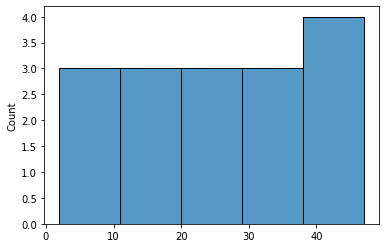

In [ ]:
sns.histplot(a)

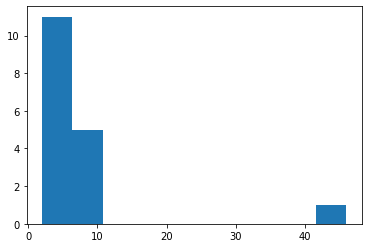

In [ ]:
b=[2,4,3,5,4,6,5,7,8,6,2,46,7,7,3,8,6]
plt.hist(b,bins=10)
plt.show()

<AxesSubplot:ylabel='Count'>

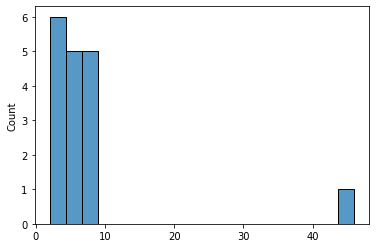

In [ ]:
sns.histplot(b,)

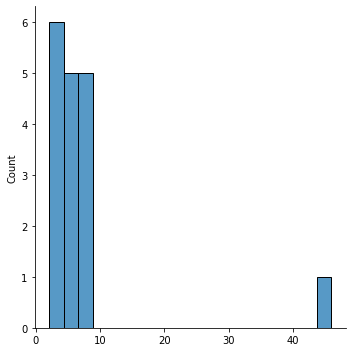

In [ ]:
sns.distplot(b)